In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv('dataset/dataset.csv')

# Simple regressions

## Wave 1

We filter for wave 1

In [22]:
dataset_wave1 = dataset[dataset['wave'] == 1]

We define as **Performance Index** the following variable:

In [23]:
new_cases_pc = (dataset_wave1['new_cases'].values) / (dataset_wave1['population'].values)
new_deaths_pc = (dataset_wave1['new_deaths'].values) / (dataset_wave1['population'].values)
new_tests_pc = (dataset_wave1['new_tests'].values) / (dataset_wave1['population'].values)
new_vaccinations_pc = (dataset_wave1['new_vaccinations'].values) / (dataset_wave1['population'].values)
icu_patients_pc = (dataset_wave1['icu_patients'].values) / (dataset_wave1['population'].values)

dataset_wave1['performance_index'] = (1 * new_tests_pc) + (4 * new_vaccinations_pc) - (2 * icu_patients_pc) - (1 * new_cases_pc) - (3 * new_deaths_pc)

/var/folders/cv/d353rzp16yl37xs9v7mdht3c0000gn/T/ipykernel_87497/3579784416.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_wave1['performance_index'] = (1 * new_tests_pc) + (4 * new_vaccinations_pc) - (2 * icu_patients_pc) - (1 * new_cases_pc) - (3 * new_deaths_pc)


Setting indipendent variables

In [24]:
X = np.array([
    dataset_wave1['corruption_control'].values, 
    dataset_wave1['cpi'].values, 
    dataset_wave1['governament_effectiveness'].values, 
    dataset_wave1['healthcare_expenditure'].values, 
    dataset_wave1['political_regime'].values, 
    dataset_wave1['trust_in_governance'].values, 
    dataset_wave1['government_type'].values
]).T

X_names = [
    'Corruption Control', 
    'CPI', 
    'Governament Effectiveness', 
    'Healthcare Expenditure', 
    'Political Regime', 
    'Trust in Governance', 
    'Government Type'
]

locations = np.array([
    dataset_wave1['location'].values
]).T

Performing multiple regression using **performance index** as the dependent variable

In [25]:
Y = dataset_wave1['performance_index'].values

model = LinearRegression().fit(X, Y)

coeff = model.coef_
intercept = model.intercept_
X2 = sm.add_constant(X)

est = sm.OLS(Y, X2)
est2 = est.fit()

print(est2.summary(
    xname=['Const'] + X_names,
    yname='Performance index'
))

                            OLS Regression Results                            
Dep. Variable:      Performance index   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.114
Date:                Sun, 30 Jan 2022   Prob (F-statistic):              0.382
Time:                        11:01:50   Log-Likelihood:                 52.611
No. Observations:                  36   AIC:                            -89.22
Df Residuals:                      28   BIC:                            -76.55
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Const                 

## Plots

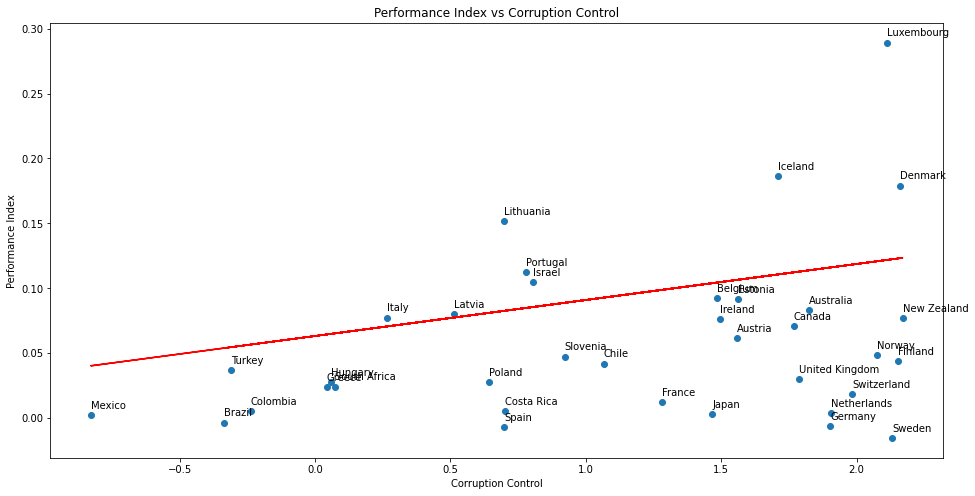

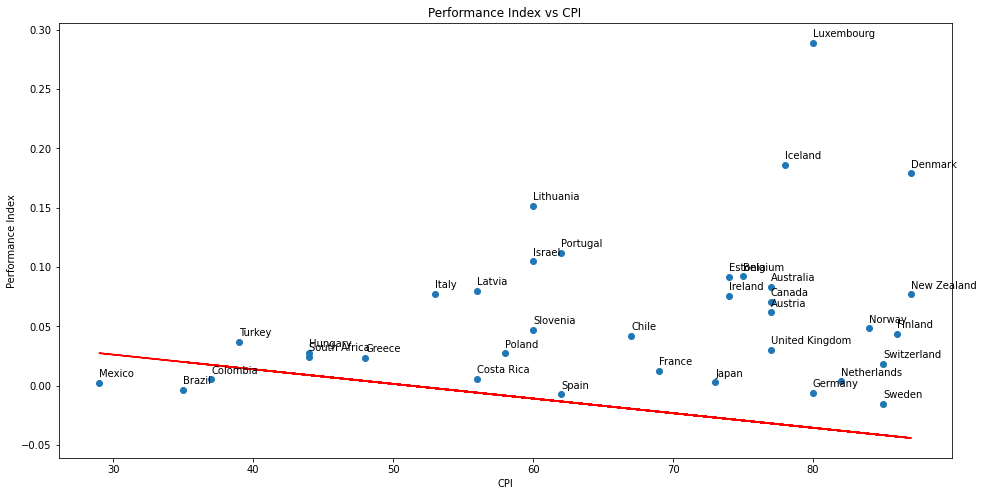

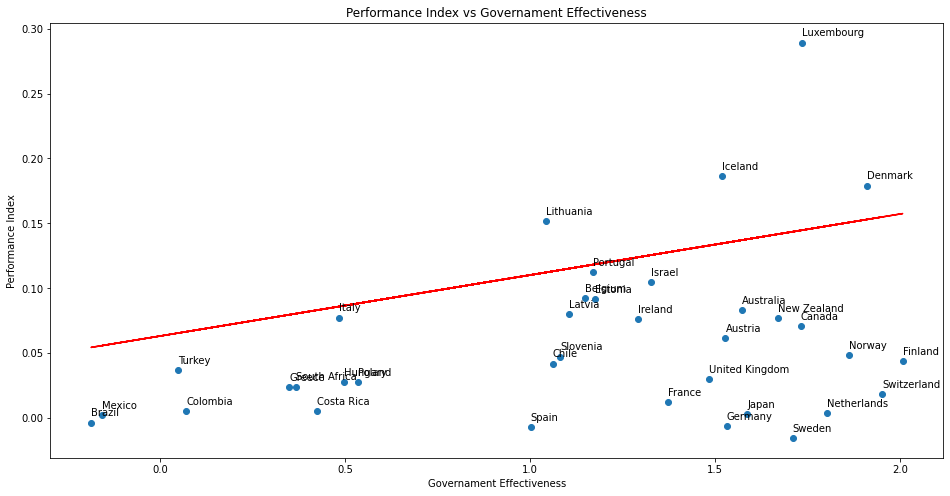

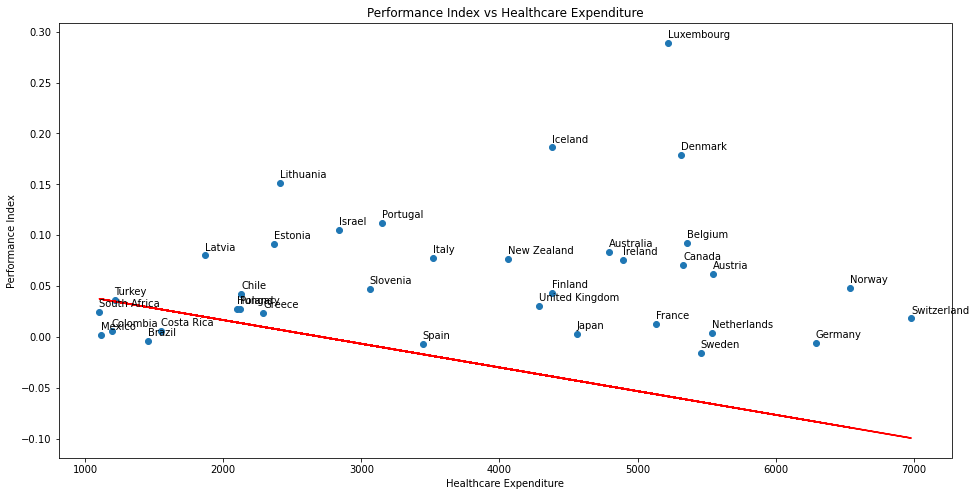

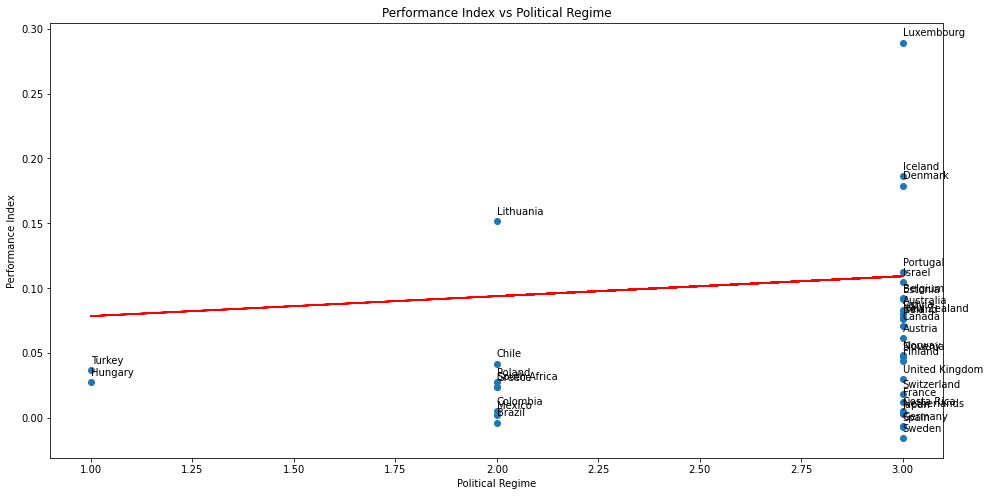

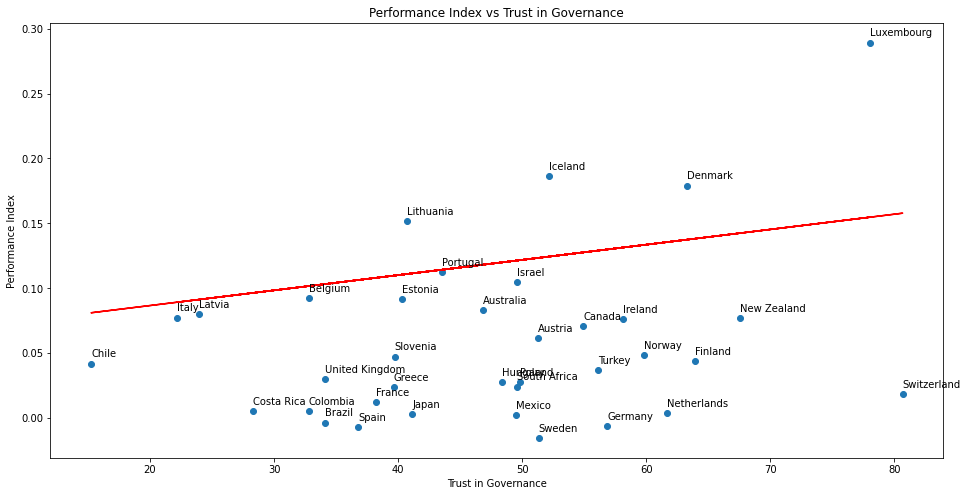

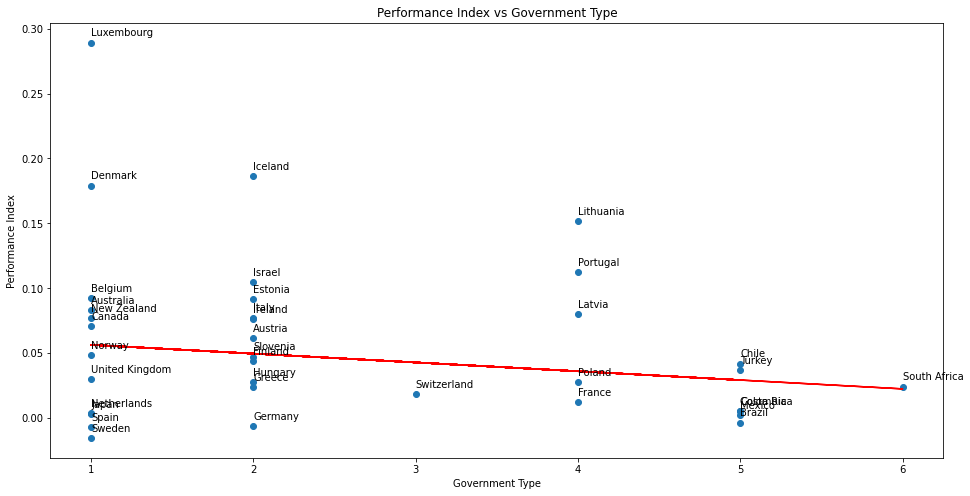

In [38]:
def create_plot(x, y, locations, x_label, y_label, title, coeff, intercept, show_names):    
    plt.figure(figsize=(16, 8))
    plt.title(title)
    plt.scatter(x, y)

    plt.plot(x, coeff * x + intercept, color='red')

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    if show_names:
        for i, txt in enumerate(locations):
            plt.annotate(txt[0], (x[i], y[i]), xytext=(x[i], y[i] + 0.005))

    plt.show()

i = 0
for x_variable in X.T:
    create_plot(x_variable, Y, locations, X_names[i], 'Performance Index', 'Performance Index vs ' + X_names[i], coeff[i], intercept, True)
    i += 1
    